<a href="https://colab.research.google.com/github/bingxl/example/blob/master/python/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN 发展 Lenet(1998) -> AlexNet(2012) -> VGGNet(2014) -> InceptionNet(2014) -> ResNet(2015)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt
print(f'tensorflow version: {tf.__version__}')

tensorflow version: 2.2.0-rc2


In [0]:
# 加载数据
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 每个网络的输入层
input_layer = tf.keras.layers.InputLayer(input_shape=(32, 32, 3))
layers = tf.keras.layers
Model = tf.keras.Model

In [0]:
def train(model, epochs=20, plot=True):
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['sparse_categorical_accuracy']
    )
    
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    print('############# the model summary ##############')
    model.summary()
    print('################## model weights ##########################')
    for v in model.trainable_variables:
        print(f'variable name: {v.name}, shape: {v.shape}')
    if plot:
        # 显示训练集和验证集的acc和loss曲线
        acc = history.history['sparse_categorical_accuracy']
        val_acc = history.history['val_sparse_categorical_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        plt.subplot(1, 2, 1)
        plt.plot(acc, label='Training Accuracy')
        plt.plot(val_acc, label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()
        pass

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0767 - sparse_categorical_accuracy: 0.2120 - val_loss: 1.9287 - val_sparse_categorical_accuracy: 0.2790
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8149 - sparse_categorical_accuracy: 0.3333 - val_loss: 1.6970 - val_sparse_categorical_accuracy: 0.3830
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6676 - sparse_categorical_accuracy: 0.3901 - val_loss: 1.6186 - val_sparse_categorical_accuracy: 0.4159
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5786 - sparse_categorical_accuracy: 0.4210 - val_loss: 1.5845 - val_sparse_categorical_accuracy: 0.4190
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5122 - sparse_categorical_accuracy: 0.4476 - val_loss: 1.4650 - val_sparse_categorical_accuracy: 0.4662
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4562 - spars

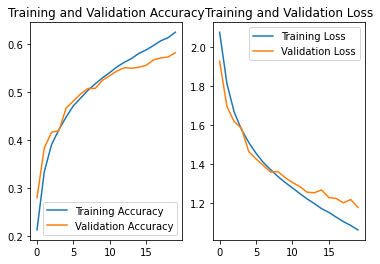

In [12]:
def LeNet():
    # leNet最初始的卷积神经网络
    # LeNet还没有dropout， 激活函数常用sigmoid
    layers = tf.keras.layers
    model = tf.keras.Sequential([
        input_layer,
        layers.Conv2D(filters=6, strides=1, kernel_size=(5, 5), padding='valid', activation='sigmoid'),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

        layers.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding='valid', activation='sigmoid'),
        layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),

        layers.Flatten(),
        layers.Dense(120, activation='sigmoid'),
        layers.Dense(84, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])
    train(model)
    return model
LeNet()
    

Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6219 - sparse_categorical_accuracy: 0.4059 - val_loss: 2.0118 - val_sparse_categorical_accuracy: 0.3589
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3015 - sparse_categorical_accuracy: 0.5390 - val_loss: 1.3540 - val_sparse_categorical_accuracy: 0.5048
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1756 - sparse_categorical_accuracy: 0.5904 - val_loss: 1.3656 - val_sparse_categorical_accuracy: 0.5196
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0854 - sparse_categorical_accuracy: 0.6235 - val_loss: 1.1687 - val_sparse_categorical_accuracy: 0.5892
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0200 - sparse_categorical_accuracy: 0.6490 - val_loss: 1.1574 - val_sparse_categorical_accuracy: 0.5924
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9732 -

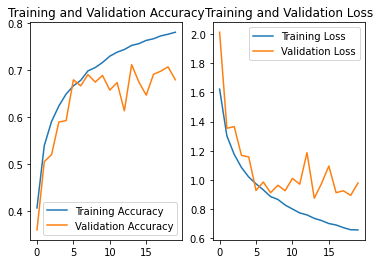

In [13]:
def AlexNet():
    # 使用relu激活函数提高准确率， 使用dropout缓解过拟合
    layers = tf.keras.layers
    model = tf.keras.Sequential([
        input_layer,

        layers.Conv2D(filters=96,kernel_size=3, strides=1, padding='valid'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='valid'),

        layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='valid'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=(3, 3), strides=2),

        layers.Conv2D(filters=384, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),

        layers.Conv2D(filters=384, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),

        layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=(3, 3), strides=2),

        layers.Flatten(),
        layers.Dense(2048, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(2048, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    train(model)
    return model

AlexNet()

Epoch 1/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9143 - sparse_categorical_accuracy: 0.2344 - val_loss: 2.2075 - val_sparse_categorical_accuracy: 0.2414
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4987 - sparse_categorical_accuracy: 0.4199 - val_loss: 1.3905 - val_sparse_categorical_accuracy: 0.4597
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1973 - sparse_categorical_accuracy: 0.5712 - val_loss: 1.7251 - val_sparse_categorical_accuracy: 0.4483
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9925 - sparse_categorical_accuracy: 0.6584 - val_loss: 1.1669 - val_sparse_categorical_accuracy: 0.5767
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8768 - sparse_categorical_accuracy: 0.7055 - val_loss: 1.0613 - val_sparse_categorical_accuracy: 0.6419
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.

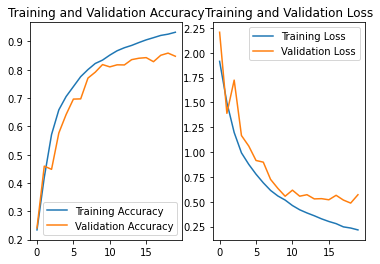

In [14]:
def VGG16Net():
    # 使用小尺寸卷积核，在减少参数的同时提高了识别准确率
    # 结构规整，非常适合硬件加速
    layers = tf.keras.layers
    
    model = tf.keras.Sequential([
        input_layer,

        # 1
        layers.Conv2D(filters=64, strides=1, kernel_size=3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 2
        layers.Conv2D(filters=64, strides=1, kernel_size=3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
        layers.Dropout(0.2),

        # 3
        layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 4
        layers.Conv2D(filters=128, strides=1, kernel_size=3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
        layers.Dropout(0.2),

        # 5
        layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 6
        layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 7
        layers.Conv2D(filters=256, strides=1, kernel_size=3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
        layers.Dropout(0.2),

        # 8
        layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 9
        layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 10
        layers.Conv2D(filters=512, strides=1, kernel_size=3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
        layers.Dropout(0.2),

        # 11
        layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 12
        layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),

        # 13
        layers.Conv2D(filters=512, strides=1, kernel_size=3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(pool_size=2, strides=2, padding='same'),
        layers.Dropout(0.2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    train(model)
    return model
VGG16Net()

Epoch 1/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6549 - sparse_categorical_accuracy: 0.3833 - val_loss: 1.3834 - val_sparse_categorical_accuracy: 0.4875
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2579 - sparse_categorical_accuracy: 0.5440 - val_loss: 1.1222 - val_sparse_categorical_accuracy: 0.5997
Epoch 3/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0749 - sparse_categorical_accuracy: 0.6143 - val_loss: 1.0227 - val_sparse_categorical_accuracy: 0.6335
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9587 - sparse_categorical_accuracy: 0.6567 - val_loss: 0.9707 - val_sparse_categorical_accuracy: 0.6577
Epoch 5/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8709 - sparse_categorical_accuracy: 0.6921 - val_loss: 0.9065 - val_sparse_categorical_accuracy: 0.6840
Epoch 6/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.

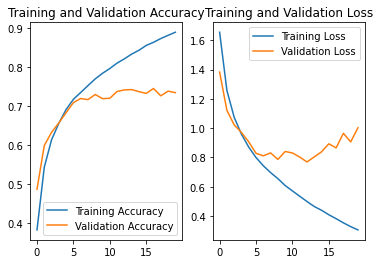

In [15]:
# Inception V1网络
class ConvBNRelu(tf.keras.Model):
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        x = self.model(x, training=False) #在training=False时，BN通过整个训练集计算均值、方差去做批归一化，training=True时，通过当前batch的均值、方差去做批归一化。推理时 training=False效果好
        return x


class InceptionBlk(tf.keras.Model):
    def __init__(self, ch, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch
        self.strides = strides
        self.c1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c2_2 = ConvBNRelu(ch, kernelsz=3, strides=1)
        self.c3_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)
        self.c3_2 = ConvBNRelu(ch, kernelsz=5, strides=1)
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')
        self.c4_2 = ConvBNRelu(ch, kernelsz=1, strides=strides)

    def call(self, x):
        x1 = self.c1(x)
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        x4_1 = self.p4_1(x)
        x4_2 = self.c4_2(x4_1)
        # concat along axis=channel
        x = tf.concat([x1, x2_2, x3_2, x4_2], axis=3)
        return x


class Inception10(tf.keras.Model):
    def __init__(self, num_blocks, num_classes, init_ch=16, **kwargs):
        super(Inception10, self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        self.num_blocks = num_blocks
        self.init_ch = init_ch
        self.c1 = ConvBNRelu(init_ch)
        self.blocks = tf.keras.models.Sequential()
        for _ in range(num_blocks):
            for layer_id in range(2):
                if layer_id == 0:
                    block = InceptionBlk(self.out_channels, strides=2)
                else:
                    block = InceptionBlk(self.out_channels, strides=1)
                self.blocks.add(block)
            # enlarger out_channels per block
            self.out_channels *= 2
        self.p1 = layers.GlobalAveragePooling2D()
        self.f1 = Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y


model = Inception10(num_blocks=2, num_classes=10)
train(model)

Epoch 1/20
1563/1563 [==============================] - 41s 26ms/step - loss: 1.3411 - sparse_categorical_accuracy: 0.5632 - val_loss: 1.6568 - val_sparse_categorical_accuracy: 0.5566
Epoch 2/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8059 - sparse_categorical_accuracy: 0.7368 - val_loss: 0.8276 - val_sparse_categorical_accuracy: 0.7361
Epoch 3/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6200 - sparse_categorical_accuracy: 0.7980 - val_loss: 0.8189 - val_sparse_categorical_accuracy: 0.7380
Epoch 4/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.4935 - sparse_categorical_accuracy: 0.8414 - val_loss: 0.6598 - val_sparse_categorical_accuracy: 0.7922
Epoch 5/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.3907 - sparse_categorical_accuracy: 0.8762 - val_loss: 0.5878 - val_sparse_categorical_accuracy: 0.8151
Epoch 6/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.

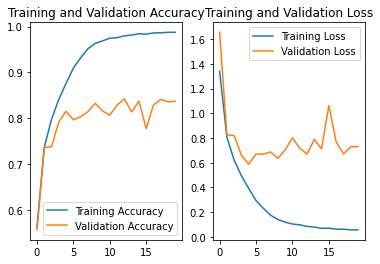

In [16]:
# ResNet
class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        # residual_path为True时，对输入进行下采样，即用1x1的卷积核做卷积操作，保证x能和F(x)维度相同，顺利相加
        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')

    def call(self, inputs):
        residual = inputs  # residual等于输入值本身，即residual=x
        # 将输入通过卷积、BN层、激活层，计算F(x)
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)

        x = self.c2(x)
        y = self.b2(x)

        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)

        out = self.a2(y + residual)  # 最后输出的是两部分的和，即F(x)+x或F(x)+Wx,再过激活函数
        return out


class ResNet18(Model):

    def __init__(self, block_list, initial_filters=64):  # block_list表示每个block有几个卷积层
        super(ResNet18, self).__init__()
        self.num_blocks = len(block_list)  # 共有几个block
        self.block_list = block_list
        self.out_filters = initial_filters
        self.c1 = Conv2D(self.out_filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.blocks = tf.keras.models.Sequential()
        # 构建ResNet网络结构
        for block_id in range(len(block_list)):  # 第几个resnet block
            for layer_id in range(block_list[block_id]):  # 第几个卷积层

                if block_id != 0 and layer_id == 0:  # 对除第一个block以外的每个block的输入进行下采样
                    block = ResnetBlock(self.out_filters, strides=2, residual_path=True)
                else:
                    block = ResnetBlock(self.out_filters, residual_path=False)
                self.blocks.add(block)  # 将构建好的block加入resnet
            self.out_filters *= 2  # 下一个block的卷积核数是上一个block的2倍
        self.p1 = tf.keras.layers.GlobalAveragePooling2D()
        self.f1 = tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y


train(ResNet18([2, 2, 2, 2]))